In [ ]:
!pip install --upgrade openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.7 MB/s eta 0:00:00


In [ ]:
import os
import openai
os.environ["OPENAI_API_KEY"] = "sk-...........................................NP"

In [ ]:
#!export OPENAI_API_KEY="sk-............................................NP"
# yalnızca linux ve macOS için çalışır.

## Fine-Tuning Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv') #encoding="utf-8"

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


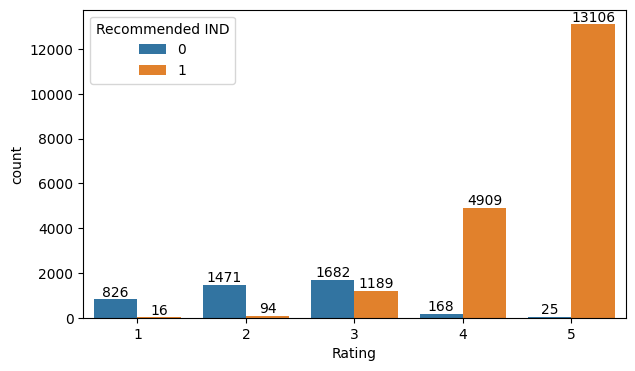

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
len(df)

23486

In [ ]:
display(len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)]))
display(len(df[(df["Rating"] == 2) & (df["Recommended IND"] == 1)]))
display(len(df[(df["Rating"] == 3) & (df["Recommended IND"] == 1)]))
display(len(df[(df["Rating"] == 4) & (df["Recommended IND"] == 0)]))
display(len(df[(df["Rating"] == 5) & (df["Recommended IND"] == 0)]))

16

94

1189

168

25

In [ ]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])
# 23486-16 = 23470

23470

In [ ]:
len(df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))])
# 23486-94 = 23392

23392

In [ ]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

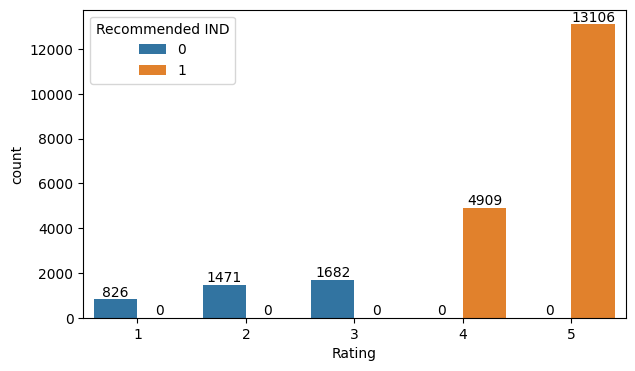

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

In [ ]:
df = df[["Review Text", "Recommended IND"]]
df = df.rename(columns= {"Review Text":"prompt", "Recommended IND":"completion"})
df.head()

# GPT (Generative Pretrained Transformer) modellerinde, "prompt" modelin girdi olarak aldığı metni ifade eder. 
# promtp isimlendirmesi ozellikle istenen bir best practicedir.
# Model daha sonra bu girdiye dayanarak metin üretir/tahmin eder ve bu metin "completion" olarak adlandırılır. 
# Completion, sağlanan prompt/girdinin sonucu olarak üretilen veya tahmin edilen metindir. 

,prompt,completion
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [ ]:
df.isnull().sum()

prompt        819
completion      0
dtype: int64

In [ ]:
# drop them
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df.head()

,prompt,completion
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df["prompt"]
y = df["completion"].map({0:"negative", 1:"positive"}) # For fine tuning in GPT models, we have to convert 
# integers to string! IMPORTANT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [ ]:
len(X_train)

19057

In [ ]:
len(X_test)

2118

### Prep Data for Fine-Tuning

In [ ]:
# IMPORTANT for GPT models: 1. concate the data 2. convert the data to JSON format
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

# GPT modelleri hem X_train ve y_train'i hem de X_test ve y_test'i concat edilmiş ve json formatına dönüştürülmüş olarak istediğinden
# öncelikle train ve test datasına ayrı ayrı concat işlemi uyguluyoruz.

In [ ]:
test.head()

,prompt,completion
17246,The cut and color of the dress is awesome. how...,negative
13144,I got this in the green blue pink motif and i ...,positive
16645,I love this top! usually i prefer neutral colo...,positive
3755,Cute little sleep mask! the elastic band is wi...,positive
2972,I am 5 6' and 130 pounds and ordered this in a...,negative


In [ ]:
# jsonl = json line
train.to_json("train.jsonl", orient='records', lines=True)

# DİKKAT, GPT modelleri datayı JSON lines formatında istediğinden concat ettiğimiz train ve test datasını ayrı ayrı JSON lines objesine 
# dönüştürüyoruz.
# JSON lines formatı her satırın ayrı ayrı JSON objesine dönüştürülmesine denir.

# Bu kod, train adlı bir pandas DataFrame objesini "to_json" metodunu kullanarak DataFrame'deki verileri "df.jsonl" adlı bir dosyaya 
# JSON Lines formatında kaydeder. 
# orient='records' argümanı, DataFrame'in her satırının ayrı bir JSON objesi olmasını sağlar.
# lines=True argümanı her JSON objesinin ayrı bir satırda yazılmasını sağlar. False olursa, JSON objesine dönüşen tüm satırlar bir liste içinde sırayla yazılır.

In [ ]:
test.to_json("val.jsonl", orient='records', lines=True)
# aynı işlemi test datasına da uyguluyoruz.

In [ ]:
import json
import codecs

with codecs.open('val.jsonl', 'r', encoding='utf-8') as f:
  a = 0
  for line in f:
    obj = json.loads(line)
    print(obj)
    a+=1

    if a==5:
      break
# Bu kod, yukarda oluşturduğumuz 'val.jsonl' adlı JSON Lines dosyasını açar ve dosyanın ilk 5 satırındaki JSON nesnelerini okur ve ekrana yazdırır. 
# "codecs.open" fonksiyonu ile dosya UTF-8 kodlaması ile açılır ve f adlı bir dosyaya atanır.
# for döngüsü ile f dosyasından çekilen her satır "json.loads" fonksiyonu ile bir JSON nesnesine dönüştürülür. 
# Bu kodu json lines formatını görmek için kullandık.

{'prompt': "The cut and color of the dress is awesome. however, the biggest flaw is the zipper. i only got to wear this dress once until the zipper broke..sad day especially at the price. there also were a number of loose threads. i recommend waiting until it goes on sale. you'll want the extra money for a tailor to fix that zipper.", 'completion': 'negative'}
{'prompt': "I got this in the green blue pink motif and i love it. really nice flow and not tent like at all. 5'8, 135, and in a size 6 i don't find this shows my stomach at all. it's really comfortable and i love the colors. i did get this in store at 15% off and i think it's a little pricy for a rayon shirt without the discount.", 'completion': 'positive'}
{'prompt': "I love this top! usually i prefer neutral colors, but i looked at every one of the colors, and fell in love with the pink. i think it looks the best with the embroidery at the top. i too love this cut on my shoulders for summer. i would definitely recommend this t

#### The OpenAI command-line interface (CLI) is used for the use of GPT codes on the notebook.

In [ ]:
!openai tools fine_tunes.prepare_data -f train.jsonl #-q

# -q neden yoruma alfdik. yorum olmazsa asagida soracagi sorularin tamamini kendisi yes olarak cevaplayarak devam
# eder. bu sorulardan train-test ayrimina hayir diyecegimiz icin yoruma aldik.
# aslinda diger modellerin skorlariyla akrsilastirmamak icin train-val diye bolmus olmasaydik test icin bu
# sorya da yes deyip devam edebilridik

# Bu kod ile datamızı GPT fine-tuning için hazır hale getiriyoruz.
# prompt sonuna `\n\n###\n\n` belirteci ilave edilerek modelin promptun nerde bittiğini anlamasını sağlıyoruz. 
# completion başına whitespace/boşluk ilave ederek modelin bu boşluğu gördüğünde tahmin yapması gerektiğini anlar 
# hem de yapacağı tahmini çok daha başarılı şekilde yapar.

# bu kodu calistirinca sorulacaklar:
# - [Recommended] Remove 4 duplicate rows [Y/n]: y
# - [Recommended] Add a suffix separator `\n\n###\n\n` to all prompts [Y/n]: y
# - [Recommended] Add a whitespace character to the beginning of the completion [Y/n]: y
# - [Recommended] Would you like to split into training and validation set? [Y/n]: n (neden no dedik:
# cunku zaten train ve val diye ayirdir
# Your data will be written to a new JSONL file. Proceed [Y/n]: y (kaydettigi dosya directoryde cikar)

Analyzing...

- Your file contains 19057 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 4 duplicated prompt-completion sets. These are rows: [5731, 9614, 12628, 16594]
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples. If you intend to do open-ended generation, then you should leave the prompts empty
- The completion should start with a whitespace character (` `). This tends to produce better results due to the tokenizati

In [ ]:
# the same for validation data
!openai tools fine_tunes.prepare_data -f val.jsonl 

Analyzing...

- Your file contains 2118 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples. If you intend to do open-ended generation, then you should leave the prompts empty
- The completion should start with a whitespace character (` `). This tends to produce better results due to the tokenization we use. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for

### Fine-Tuning

In [ ]:
# Bu kodda, OpenAI komut satırı arayüzünü (Command-Line Interface-CLI) kullanılmıştır. 
# OpenAI CLI'si, OpenAI tarafından sağlanan API(Application Programming Interface)'lerine komut satırından erişim sağlamak için geliştirilmiş bir araçtır. 
# CLI aracılığıyla OpenAI API'sini kullanarak metin tabanlı AI modellerini etkileşimli olarak çalıştırabilirsiniz.
#`!openai` komutu OpenAI CLI'yi çağırmak için kullanılır.
# `api fine_tunes.create` alt komutu bir ince ayar işlemini tanımlamak/başlatmak için kullanılır.
!openai api fine_tunes.create \
        -t "/content/train_prepared.jsonl" \
        -v "/content/val_prepared.jsonl" \
        -m ada \
        --n_epochs 4 \
        --batch_size 35 \
        --learning_rate_multiplier 0.05 \
        --suffix "sentiment analysis model" \
        --compute_classification_metrics \
        --classification_n_classes 2 \
        --classification_positive_class " negative" # hedef labelımızı tanımlıyoruz. onune 1 space'e dikkat. cunku
# train ve val data icin completion onune bir space'e yes demistik yukarda

#-t modele vereceğimiz train datasını tanımlıyoruz.
#-v modele vereceğimiz val datasını tanımlıyoruz.
#-m hangi modeli kullanacağımızı belirtiyoruz.
# n_epochs default 4'dür. Genelde 1 ile 2 epeochda daha iyi sonuçlar verdiği görülmüş ve tavsiye edilmiştir.
# batch_size tavsiye edilen train datasının 0.002 kadar. max 256'yı geçemez.
# learning_rate_multiplier, 0.02-0.2 arasındaki değerler tavsiye ediliyor, büyük datalar için büyük oranlar, küçük datalar 
# için küçük oranlar tavsiye edilir.
# suffix, fine-tune sonrası modelimizi tanımlamak için son ek ilave ediyoruz.

# neden model olarak ada sectik. classificationda ada tercih edilir, hem daha ucuz hem daha iyi skor verir.
# zaten yukarda da !openai tools fine_tunes.prepare_data -f train.jsonl #-q kosunun outputunda modelin kendisi
# bunu tavsiye etmisti.

Upload progress: 100% 6.82M/6.82M [00:00<00:00, 6.86Git/s]
Uploaded file from /content/train_prepared.jsonl: file-VgphpiocGqfxZzrcVXfaEVLo
Upload progress: 100% 759k/759k [00:00<00:00, 1.17Git/s]
Uploaded file from /content/val_prepared.jsonl: file-zXsanFP7UUoVajWOqwvn1YBO
Created fine-tune: ft-HXF2BAGJqPiRFvgtii5pFnkh
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-04-27 09:54:30] Created fine-tune: ft-HXF2BAGJqPiRFvgtii5pFnkh
[2023-04-27 09:54:49] Fine-tune costs $2.38
[2023-04-27 09:54:49] Fine-tune enqueued. Queue number: 0
[2023-04-27 09:54:53] Fine-tune started



In [ ]:
!openai api fine_tunes.get -i ft-HXF2BAGJqPiRFvgtii5pFnkh 
# -i fine-tuning yapılan modelin id numarasını tanımlar.
# bu kod ile id'sini belirtiğimiz modelin fine-tune işlemlerine ilşkin bilgileri görüp takip edebiliriz.

{
  "created_at": 1682589270,
  "events": [
    {
      "created_at": 1682589270,
      "level": "info",
      "message": "Created fine-tune: ft-HXF2BAGJqPiRFvgtii5pFnkh",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1682589289,
      "level": "info",
      "message": "Fine-tune costs $2.38",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1682589289,
      "level": "info",
      "message": "Fine-tune enqueued. Queue number: 0",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1682589293,
      "level": "info",
      "message": "Fine-tune started",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1682589581,
      "level": "info",
      "message": "Completed epoch 1/4",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1682590179,
      "level": "info",
      "message": "Completed epoch 3/4",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1682590528,
      "level": "info",


In [ ]:
# fine-tuning işlemini iptal etmek isterseniz bu kodu kullanıyoruz.
!openai api fine_tunes.cancel -i ft-HXF2BAGJqPiRFvgtii5pFnkh

# fine-tuning işlemi başlamış veya bitmişse aşağıdaki uyarıyı döndürür.

Error: Cannot cancel a job ft-HXF2BAGJqPiRFvgtii5pFnkh that already has status "succeeded". (HTTP status code: 400)


In [ ]:
!openai api fine_tunes.results -i ft-HXF2BAGJqPiRFvgtii5pFnkh > result.csv

# Bu kod, OpenAI komut satırı arayüzünü (CLI) kullanarak `ft-k1x0P8kIQTuHRln0BLLVmXZC` ID'li bir ince ayar işleminin sonuçlarını alıp
# `result.csv` adlı bir dosyaya kaydetmek için bir komut satırı talimatıdır. `!openai` komutu OpenAI CLI'yi çağırmak için kullanılırken 
# `api fine_tunes.results` alt komutu bir ince ayar işleminin sonuçlarını almak için kullanılır. `-i` seçeneği ince ayar işlemi yapılan modelin
#  ID'sini belirtir ve `> result.csv` komutu çıktıyı `result.csv` adlı bir dosyaya kaydeder.

In [ ]:
results = pd.read_csv('result.csv')
results

# precision, recall scoreları sadece epoch sonlarında döndürdüğünden sadece epoch sonlarındaki skorları çekeceğiz.

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
0,1,4795,35,0.151122,0.000000,0.000000,0.153360,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9310,70,0.145528,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,14385,105,0.116999,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,19740,140,0.105397,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24535,175,0.100314,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,2175,10518725,76125,0.015556,0.885714,0.885714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2175,2176,10523520,76160,0.014622,0.800000,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2176,2177,10528035,76195,0.015871,0.914286,0.914286,0.016995,0.971429,0.971429,NaN,NaN,NaN,NaN,NaN,NaN
2177,2178,10532830,76230,0.015097,0.857143,0.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
results[results["classification/recall"].notnull()]
# 4 epoch kullanndik default. ama neden 1 veya 2 kullanmamiz gerektigi anlasiliyor

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
545,546,2644950,19110,0.017205,0.714286,0.714286,NaN,NaN,NaN,0.949009,0.826790,0.915601,0.983101,0.930489,0.868932
1090,1091,5281745,38185,0.016599,0.914286,0.914286,NaN,NaN,NaN,0.958924,0.867150,0.918159,0.987303,0.948622,0.891925
1635,1636,7915460,57260,0.014060,0.942857,0.942857,NaN,NaN,NaN,0.953258,0.905556,0.833760,0.986411,0.944495,0.868176
2178,2179,10537625,76265,0.014555,0.857143,0.857143,NaN,NaN,NaN,0.950425,0.888587,0.836317,0.986104,0.944821,0.861660


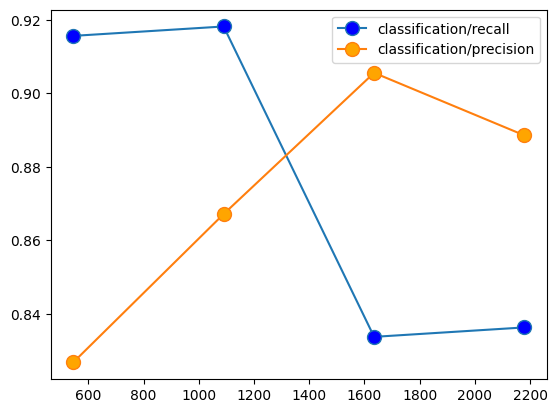

In [ ]:
results[results['classification/recall'].notnull()]['classification/recall'].plot(legend=True, 
                                                                                  marker='o',
                                                                                  markerfacecolor='blue', 
                                                                                  markersize=10)
results[results['classification/recall'].notnull()]['classification/precision'].plot(legend=True, 
                                                                                     marker='o',
                                                                                     markerfacecolor='orange', 
                                                                                     markersize=10);

# restore best weights yok; bu nedenle tekrar calistirip 2 epochla kurmamiz ve en iyi skorlari almamiz gerekir

In [ ]:
test = pd.read_json('val.jsonl', lines=True)
test.head()

,prompt,completion
0,The cut and color of the dress is awesome. how...,negative
1,I got this in the green blue pink motif and i ...,positive
2,I love this top! usually i prefer neutral colo...,positive
3,Cute little sleep mask! the elastic band is wi...,positive
4,I am 5 6' and 130 pounds and ordered this in a...,negative


In [ ]:
np.array(test["prompt"][0])

array("The cut and color of the dress is awesome. however, the biggest flaw is the zipper. i only got to wear this dress once until the zipper broke..sad day especially at the price. there also were a number of loose threads. i recommend waiting until it goes on sale. you'll want the extra money for a tailor to fix that zipper.",
      dtype='<U322')

In [ ]:
#!openai api fine_tunes.list

In [ ]:
# tahminleri almak icin tekrar api tanimlamamiz ve bir alttaki formatta kurmamiz gerekir
import openai
api_key = "sk-.............................................NP"
openai.api_key = api_key

In [ ]:
import openai
ft_model = "ada:ft-personal:sentiment-analysis-model-2023-04-27-10-15-28" # fine tuning yaplilmis modelin ismi, yukarda json outputta
sample_baseball_tweet=test["prompt"][0] # sample_review, sample_bla_bla
res =  openai.Completion.create(model=ft_model, # completion model build ediyoruz
                                prompt=sample_baseball_tweet + '\n\n###\n\n', # yukarda ilave ettigimiz bu kismi mutlaka buraya da eklmeeliyiz
                                max_tokens=1, 
                                temperature=0, 
                                logprobs=2) # 2 class oldugu icin. egitim surecinde de sinif sayisi 2 vermistik zaten
res['choices'][0]['text']

' negative'

In [ ]:
import openai

ft_model = "ada:ft-personal:sentiment-analysis-model-2023-04-27-10-15-28"
sample_baseball_tweet="If you have money to throw away, you can buy it."
res =  openai.Completion.create(model=ft_model, 
                                prompt=sample_baseball_tweet + '\n\n###\n\n', 
                                max_tokens=1, 
                                temperature=0, 
                                logprobs=2)
res['choices'][0]['text']
# yanlis tahmin etti

' positive'

In [ ]:
# hangi olasiliklara poz ve hangilerine neg verdigine bakalim
res = openai.Completion.create(model=ft_model, 
                               prompt=test['prompt'][0] + '\n\n###\n\n', 
                               max_tokens=1, 
                               temperature=0, 
                               logprobs=2)
res['choices']

[<OpenAIObject at 0x7f69f0b57b50> JSON: {
   "finish_reason": "length",
   "index": 0,
   "logprobs": {
     "text_offset": [
       329
     ],
     "token_logprobs": [
       -0.014357718
     ],
     "tokens": [
       " negative"
     ],
     "top_logprobs": [
       {
         " negative": -0.014357718,
         " positive": -4.2616034
       }
     ]
   },
   "text": " negative"
 }]

In [ ]:
# olasiliklari cekelim. bunlar olasiliklarin logratima alinmis hali
res = openai.Completion.create(model=ft_model, 
                               prompt=test['prompt'][0] + '\n\n###\n\n', 
                               max_tokens=1, 
                               temperature=0, 
                               logprobs=2)
res['choices'][0]['logprobs']['top_logprobs'][0]

<OpenAIObject at 0x7f69f01d4360> JSON: {
  " negative": -0.014357718,
  " positive": -4.2616034
}

In [ ]:
# log.ik olasiliklari normal mat ifadeye cevirelim
import math

math.exp(-0.014357718)

0.9857448625055906

In [ ]:
# ayni sayinin logunu alirsak yukardaki cikar
np.log(0.9857448625055906)

# modelin döndürdüğü değerler olasılığın logaritmik değeridir.

-0.014357717999999962

In [ ]:
np.e**-0.014357718

0.9857448625055906

In [ ]:
math.exp(-4.2616034)

0.014099676854235006

In [ ]:
np.e**-4.2616034

0.01409967685423501

https://medium.com/ubiai-nlp/how-to-fine-tune-gpt-3-model-for-named-entity-recognition-4e4460acb924

https://cobusgreyling.medium.com/how-to-fine-tune-gpt-3-for-custom-intent-classification-95973d05d7e0

https://betterprogramming.pub/how-to-finetune-gpt-3-finetuning-our-virtual-mental-health-assistant-641c1f3b1ef3

## Chat Bot

In [ ]:
import openai
api_key = "sk-.................................................NP"
openai.api_key = api_key

In [ ]:
df_en = pd.read_csv("/content/drive/MyDrive/chat_bot_eng.csv")
df_en 

,title,text
0,Cargo,"We work with Aras Cargo, Yurtiçi Cargo, PTT C..."
1,Credit Cart,"At our store, credit card payments can be made..."
2,Warranty,The warranty period of the products sold in ou...


### Return the text to word/sentence embedding with GPT

In [ ]:
text= "Hello, How are you?"
model="text-embedding-ada-002" # cheapest and best performing model is currently ada 002
openai.Embedding.create(input=text, model=model)

<OpenAIObject list at 0x7f69f01e5710> JSON: {
  "data": [
    {
      "embedding": [
        0.0016321605071425438,
        -0.00025636341888457537,
        -0.004111331421881914,
        -0.036088354885578156,
        -0.011464777402579784,
        0.019262349233031273,
        -0.011642428115010262,
        -0.005161370616406202,
        -0.01149015687406063,
        -0.0051423367112874985,
        0.028601670637726784,
        0.009510626085102558,
        -0.011820077896118164,
        -0.0076326108537614346,
        0.00638906005769968,
        -0.012981148436665535,
        0.02223164401948452,
        -0.005843420047312975,
        0.01864057406783104,
        -0.008800026029348373,
        -0.026342976838350296,
        0.008806370198726654,
        0.013488720171153545,
        -0.0004393668205011636,
        -0.006021070294082165,
        -0.008736579678952694,
        0.018818223848938942,
        -0.013882088474929333,
        0.01965571753680706,
        -0.030505064874887

In [ ]:
# extract word embedding
openai.Embedding.create(input=text, model=model)['data'][0]['embedding']

[0.001557213836349547,
 -0.0002974809904117137,
 -0.00410603079944849,
 -0.036072149872779846,
 -0.011404231190681458,
 0.01930532604455948,
 -0.011696158908307552,
 -0.005115086678415537,
 -0.011562887579202652,
 -0.005124605726450682,
 0.028710484504699707,
 0.009589200839400291,
 -0.011880201287567616,
 -0.007717053405940533,
 0.006479532457888126,
 -0.012857524678111076,
 0.022199220955371857,
 -0.005835386924445629,
 0.018569160252809525,
 -0.008865727111697197,
 -0.026425831019878387,
 0.008846688084304333,
 0.013568306341767311,
 -0.00048826547572389245,
 -0.00602260185405612,
 -0.00877687893807888,
 0.01872147060930729,
 -0.0138856191188097,
 0.019686102867126465,
 -0.030462052673101425,
 0.0028034609276801348,
 -0.0029875023756176233,
 -0.0064446283504366875,
 -0.0036840045358985662,
 0.010629987344145775,
 -0.021069586277008057,
 0.004439209587872028,
 -0.01230540033429861,
 0.020003415644168854,
 -0.011067879386246204,
 0.021336130797863007,
 0.003769678995013237,
 0.0152944

In [ ]:
len(openai.Embedding.create(input=text, model=model)['data'][0]['embedding'])

1536

In [ ]:
# icine texti ve model ismini verdigimizde bize embeddingleri olusturan bir function kuralim. ayni
# zamanda new linelari da kaldirsin. cunku ornegin "kirmizi" satir sonu "araba" satir basi denk gelirse
# semantic relationshipi iyi kuramaz model.
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input=text, model=model)['data'][0]['embedding']

In [ ]:
df_en['title_embedding'] = df_en.title.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))

# df'deki title (başlıkları) word embeddinglere dönüştürüyoruz. Daha sonra sorduğumuz sorunun word embeddingi ile title embeddinglerin
# benzerlerine bakacağız ve en çok benzeyen title'a karşılık gelen text'e sorumuzu soracağız.

In [ ]:
df_en

,title,text,title_embedding
0,Cargo,"We work with Aras Cargo, Yurtiçi Cargo, PTT C...","[0.0006662736996077001, -0.030225813388824463,..."
1,Credit Cart,"At our store, credit card payments can be made...","[-0.02582116238772869, -0.015312710776925087, ..."
2,Warranty,The warranty period of the products sold in ou...,"[0.016131054610013962, 0.007938563823699951, -..."


In [ ]:
question = "How many installments can be made on a credit card?"
question_embedding = get_embedding(question, model='text-embedding-ada-002')

# sorumuzu word embeddinge dönüştürüyoruz. Aşağıda bu word embedding ile title embeddinglerin benzerliğine bakacağız.

In [ ]:
from openai.embeddings_utils import cosine_similarity

df_en["similarity"] = df_en.title_embedding.apply(lambda x: cosine_similarity(x, question_embedding))

# df_en["similarity"] ile df_en'e similarity scorelarını gösteren "similarty" feature ilave ediliyor.

In [ ]:
df_en

,title,text,title_embedding,similarity
0,Cargo,"We work with Aras Cargo, Yurtiçi Cargo, PTT C...","[0.0006662736996077001, -0.030225813388824463,...",0.741791
1,Credit Cart,"At our store, credit card payments can be made...","[-0.02582116238772869, -0.015312710776925087, ...",0.835498
2,Warranty,The warranty period of the products sold in ou...,"[0.016131054610013962, 0.007938563823699951, -...",0.764516


In [ ]:
df_en.sort_values(by="similarity", ascending=False)

# similarity scorelarını büyükten küçüğe sıralıyoruz.

,title,text,title_embedding,similarity
1,Credit Cart,"At our store, credit card payments can be made...","[-0.02582116238772869, -0.015312710776925087, ...",0.835498
2,Warranty,The warranty period of the products sold in ou...,"[0.016131054610013962, 0.007938563823699951, -...",0.764516
0,Cargo,"We work with Aras Cargo, Yurtiçi Cargo, PTT C...","[0.0006662736996077001, -0.030225813388824463,...",0.741791


In [ ]:
df_en.sort_values(by="similarity", ascending=False).iloc[0].text

# En büyük benzerlik scorunu almış ilk satırdaki texte sorumuzu soracağız. iloc[0] ile en yüksek benzerlik skoru alan texti çekiyoruz.

'At our store, credit card payments can be made in 2 to 12 installments, depending on the total purchase amount.  If you wish to cancel an order you have placed with us, you need to contact us first. Once the cancellation is approved, a refund will be made to the credit card you used for payment.  Refund timeline: The timeline for refunds in case of order cancellation or return may vary depending on your bank and credit card. Typically, refunds are credited to your account within 3-5 business days after the return is approved.  All credit cards issued by any bank are accepted at our store. You can also use Visa, MasterCard, and American Express cards.  Some banks offer reward points for credit card spending. You can use these points as a discount for your next purchase. The usage of points varies depending on your bank.  For more information on credit card transactions, please contact our customer service team. '

In [ ]:
# basit bir chat bot yapalim
def chat_bot():
  
  while True:
    query = input("Hello, do you have any questions? Please respond with Yes or No ")
         
    if query.lower() == "yes":
      print("We would be happy to hear your question.")
      question = input("Please enter your question: ")
      question_embedding = get_embedding(question, model='text-embedding-ada-002')
      df_en["similarty"] = df_en.title_embedding.apply(lambda x: cosine_similarity(x, question_embedding))
      df_new = df_en.sort_values(by="similarty", ascending=False)
      context = df_new.iloc[0].text.replace("\n", " ")
      
      import openai

      res = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", 
        messages=[
            {"role": "system", "content": f"You are a helpful assistant. If the questions asked to you are related to cargo, credit card or warranty, answer according to \
            the {context}. If you are not sure about the questions, say 'I am sorry, I don’t know. If you want, I can transfer you to a customer representative'."},
            {"role": "user", "content": "Hello, how many days will it take for the product I purchased to reach me?"}, # 1 shot training: kaldirilabilir ya da artirilabilir sayisi
            {"role": "assistant", "content": "Hello, the products you purchased usually reach you within 1-3 business days."},
            {"role": "user", "content": f"{question}"}],
        temperature=0,
        top_p=1,
        presence_penalty=0,
        frequency_penalty=0)
      print(res['choices'][0]["message"]["content"])
      return chat_bot()

    elif query.lower() == "no":
      print("Thank you, we wish you a good day.")
      break
    else:
      print("Please provide a valid response. (Yes/No)") 

In [ ]:
"How many installments can be made on a credit card?"
"What happens if the cargo cannot find me at my address?"
"How long is the warranty for the product I bought?"

In [ ]:
chat_bot()

Hello, do you have any questions? Please respond with Yes or No yes
We would be happy to hear your question.
Please enter your question: How many installments can be made on a credit card?
At our store, credit card payments can be made in 2 to 12 installments, depending on the total purchase amount.
Hello, do you have any questions? Please respond with Yes or No yes
We would be happy to hear your question.
Please enter your question: What happens if the cargo cannot find me at my address?
If the courier cannot find you at your address, they will leave a note and try to deliver the next day. If the product cannot be delivered after two delivery attempts, the courier will be held for 3 business days. If the product is still not collected within this time, it will be returned.
Hello, do you have any questions? Please respond with Yes or No What happens if the cargo cannot find me at my address?
Please provide a valid response. (Yes/No)
Hello, do you have any questions? Please respond with

## NER (Name Entity Recognition) with Zero-Shot Training

how to find the name of human beings or objects in the text:

In [ ]:
import openai
api_key = "sk-...................................................NP"
openai.api_key = api_key

In [ ]:
sentences = ["When I visited Japan, I was amazed by the efficiency and cleanliness of the public transportation system.",
             "The art museum we visited in Paris was so vast and impressive that we spent an entire day exploring it.",
             "When I visited Australia, I was struck by the vastness and diversity of the landscape, from the bustling cities to the vast outback.",
             "The White House is located in Washington, D.C.",
             "I need to exchange dollars for euros before I travel to Europe."]

In [ ]:
def NER_1(text):


  import openai


  res = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": f"Please extract person, time, currency and place tags from the text."},
        
        {"role": "user", "content": f"{text}"}],
      max_tokens=150, 
      temperature=0.0, 
      top_p=1.0,
      frequency_penalty=0.8, # cümlede 2 defa ayni kelime varsa bir defa kullanmasi icin freq penalty'i 0.8 veya 1le cezalandirirz NER'de
      presence_penalty=0.0)
  return print(text+"\n",res['choices'][0]["message"]["content"]+"\n")

In [ ]:
for i in sentences:
  NER_1(i)

When I visited Japan, I was amazed by the efficiency and cleanliness of the public transportation system.
 Person: None
Time: Past (indicated by "visited")
Currency: None
Place: Japan

The art museum we visited in Paris was so vast and impressive that we spent an entire day exploring it.
 Person: None
Time: Past (implied)
Currency: None
Place: Paris

When I visited Australia, I was struck by the vastness and diversity of the landscape, from the bustling cities to the vast outback.
 Person: None
Time: Past (implied)
Currency: None
Place: Australia

The White House is located in Washington, D.C.
 Person: None
Time: None
Currency: None
Place: 
- White House
- Washington, D.C.

I need to exchange dollars for euros before I travel to Europe.
 Person: None mentioned
Time: Before travel to Europe
Currency: Dollars, Euros
Place: Europe



## NER with 5-Shot Training

In [ ]:
system = """Please extract person, time, currency and place tags from the text.

text: After spending several months studying abroad in Spain, I returned home with a newfound appreciation for the Spanish language and culture.
person: None
time: After spending several months studying abroad in Spain, several months
place: Spain
currency: None,

text: Despite the fact that I had saved up 100.000 USD, I still found it difficult to afford a house in the city.
person: None
time: None
place: house, city
currency: None,

text: When I was a child, my grandparents would take me on long walks through the countryside, and those memories are still some of my most cherished.
person: child, my grandparents
time: When I was a child
place: countryside
currency: None,

text: After years of working in the corporate world, John and Mary decided to start their own business, and They've never looked back.
person: John, Mary
time: After years of working in the corporate world, years
place: world
currency: None,

text: When my mother traveled to Thailand, She was amazed by the beauty and serenity of the Buddhist temples.
person: my mother,
time: When my mother traveled to Thailand,
place: Thailand, Buddhist temples
Currency: None"""

In [ ]:
def NER_2(text):


  import openai


  res = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": f"{system}"},
        
        {"role": "user", "content": f"{text}"}],
      max_tokens=150, 
      temperature=0.0, 
      top_p=1.0,
      frequency_penalty=0.8,
      presence_penalty=0.0)
  return print(text+"\n",res['choices'][0]["message"]["content"]+"\n")

In [ ]:
for i in sentences:
  NER_2(i)

When I visited Japan, I was amazed by the efficiency and cleanliness of the public transportation system.
 person: None
time: When I visited Japan
place: Japan
currency: None

The art museum we visited in Paris was so vast and impressive that we spent an entire day exploring it.
 person: None
time: an entire day
place: Paris, art museum
currency: None

When I visited Australia, I was struck by the vastness and diversity of the landscape, from the bustling cities to the vast outback.
 person: None
time: When I visited Australia,
place: Australia, cities, outback
currency: None

The White House is located in Washington, D.C.
 person: None
time: None
place: The White House, Washington D.C.
currency: None

I need to exchange dollars for euros before I travel to Europe.
 person: None
time: before I travel to Europe
place: Europe
currency: dollars, euros



In [ ]:
# ayni islem text dav vinci ile
def NER_3(system, text):

  import openai
  
  
  res =  openai.Completion.create(model="text-davinci-003", 
                                  prompt=system+"\n\n"+text+"\nPerson: ",
                                  max_tokens=60, 
                                  temperature=0, 
                                  top_p=1.0,
                                  frequency_penalty=0.8,
                                  presence_penalty=0.0)
  return print(text, "\nPerson:"+res['choices'][0]['text']+"\n")

In [ ]:
#system= "Please extract person, time, currency and place tags from the text:" 

for i in sentences:
  NER_3(system, i)

When I visited Japan, I was amazed by the efficiency and cleanliness of the public transportation system. 
Person: None
Time: When I visited Japan
Place: Japan
Currency: None

The art museum we visited in Paris was so vast and impressive that we spent an entire day exploring it. 
Person: None
Time: an entire day
Place: Paris, art museum
Currency: None

When I visited Australia, I was struck by the vastness and diversity of the landscape, from the bustling cities to the vast outback. 
Person: None
Time: When I visited Australia
Place: Australia, cities, outback
Currency: None

The White House is located in Washington, D.C. 
Person: None
Time: None
Place: White House, Washington, D.C.
Currency: None

I need to exchange dollars for euros before I travel to Europe. 
Person: None
Time: None
Place: Europe
Currency: Dollars, Euros

